|Name:|Tufan Kundu|
|-|-|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Experiment:|12|
|Date:|16 October,2025|

 ## Question 1: Collect the dataset regarding ECG (Electrocardiogram) signals of different  subjects given in the moodle platform and prepare an autoencoder that can perform anomaly  detection. The dataset you see has two classes, normal (0) and abnormal (1) ECG signals.  The labels are also provided in the same csv file. The task is to construct an autoencoder  that can detect an abnormal ECG signal. Train an autoencoder on the normal ECG signals.  Then use a suitable method using reconstruction error to flag abnormal ecg’s. And you can  check with your test set data the outputs.

### Importing necessary libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

### Loading the dataset

In [81]:
df = pd.read_csv("as.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,131,132,133,134,135,136,137,138,139,140
0,0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [82]:
## dropping the first column containing the serial no
df = df.drop(df.columns[0], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


### Separating the feature and target column

In [83]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [84]:
x

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.12343082,
         0.92528624,  0.19313742],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  0.77381971,
         1.1196209 , -1.4362499 ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.32109663,
         0.90422673, -0.42179659],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.874136  ,
        -2.0083694 , -1.8083338 ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.261335  ,
         1.1504486 ,  0.80493225],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -2.2600228 ,
        -1.577823  , -0.68453092]])

In [85]:
y


array([1., 1., 1., ..., 0., 0., 0.])

In [86]:
print(f"Normal samples: {(y==0).sum()}, \nAbnormal samples: {(y==1).sum()}")

Normal samples: 2079, 
Abnormal samples: 2919


### Splitting normal and abnormal ECG samples

In [87]:
x_normal = x[y == 0]
x_abnormal = x[y == 1]

### Splitting normal data into train and test

In [88]:
x_train,x_test_normal = train_test_split(x_normal, test_size=0.2,random_state=42)

In [89]:
x_test = np.vstack([x_test_normal, x_abnormal])
y_test = np.hstack([
    np.zeros(len(x_test_normal)), 
    np.ones(len(x_abnormal))
])

In [90]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [91]:
print(f"Train shape: {x_train_scaled.shape}, Test shape: {x_test_scaled.shape}")

Train shape: (1663, 140), Test shape: (3335, 140)


### Building the model

In [92]:
input_dim = x.shape[1]

autoencoder = Sequential([
    Dense(256, activation = 'relu', input_shape = (input_dim,)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(input_dim, activation='linear')
])

autoencoder.summary()

c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 256)            │        36,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 140)            │        35,980 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,764 (620.17 KB)

 Trainable params: 158,764 (620.17 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
autoencoder.compile(optimizer='adam', loss = 'mse', metrics=['mae'])


In [94]:
estop = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1, restore_best_weights = True )
history = autoencoder.fit(
    x_train_scaled, x_train_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks = [estop],
    verbose=1
)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.8639 - mae: 0.6321 - val_loss: 0.3930 - val_mae: 0.4205
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4076 - mae: 0.4054 - val_loss: 0.2963 - val_mae: 0.3455
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3001 - mae: 0.3370 - val_loss: 0.2339 - val_mae: 0.2954
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2178 - mae: 0.2869 - val_loss: 0.2152 - val_mae: 0.2796
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1815 - mae: 0.2631 - val_loss: 0.2054 - val_mae: 0.2663
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1630 - mae: 0.2553 - val_loss: 0.1935 - val_mae: 0.2568
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1763 - mae: 0.2542 - val_loss: 0.1825 - val_mae: 0.2538
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1555 - mae: 0.2420 - val_loss: 0.1754 - val_mae: 0.2411
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1339 - mae: 

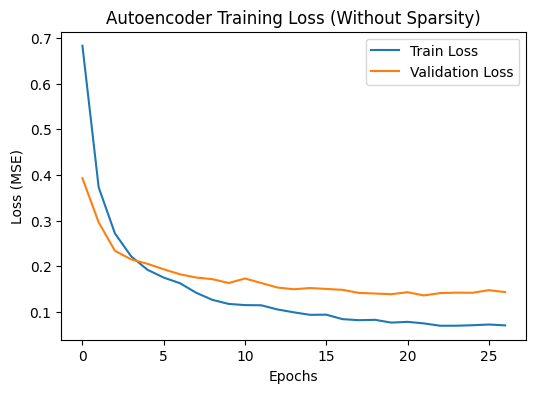

In [95]:
# Plot training history
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss (Without Sparsity)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

### Anomaly detection using reconstruction error

In [96]:
def reconstruction_errors(model, data):
    reconstructed = model.predict(data, verbose=0)
    errors = np.mean((data - reconstructed) ** 2, axis=1)
    return errors


In [97]:
## error on test test
errors = reconstruction_errors(autoencoder, x_test_scaled)

# Computing threshold using normal data
normal_errors = reconstruction_errors(autoencoder, x_test_scaled[y_test == 0])
threshold = np.percentile(normal_errors, 90)
print(f"Detection threshold: {threshold:.6f}")

## Flagging the anomalies
y_pred = (errors > threshold).astype(int)

Detection threshold: 0.104929


In [98]:
print("\nClassification Report (Without Sparsity):")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, errors):.4f}")


Classification Report (Without Sparsity):
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       416
         1.0       0.99      1.00      0.99      2919

    accuracy                           0.98      3335
   macro avg       0.98      0.95      0.96      3335
weighted avg       0.98      0.98      0.98      3335

ROC-AUC Score: 0.9480


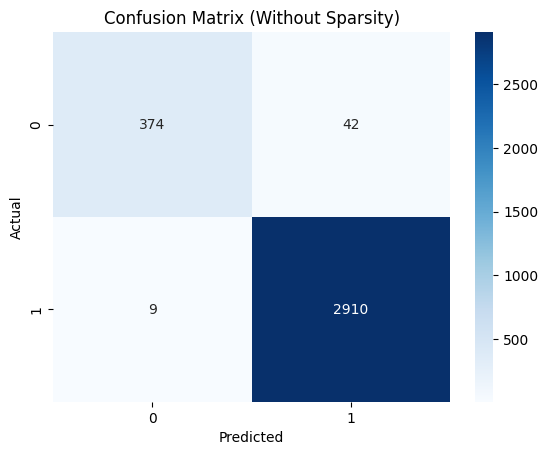

In [99]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Without Sparsity)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Question 2: Include sparsity regularization and compare your results.

### Building the sparse autoencoder model

In [100]:
sparse_autoencoder = Sequential([
    Dense(256, activation = 'relu', input_shape = (input_dim,),
          activity_regularizer = regularizers.l1(1e-4)),
    Dense(128, activation = 'relu',activity_regularizer = regularizers.l1(1e-4)),
    Dense(64, activation = 'relu',activity_regularizer = regularizers.l1(1e-4)),
    Dense(32, activation = 'relu',activity_regularizer = regularizers.l1(1e-4)),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(input_dim, activation='linear')
])

sparse_autoencoder.summary()
sparse_autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 256)            │        36,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 140)            │        35,980 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,764 (620.17 KB)

 Trainable params: 158,764 (620.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2393 - mae: 0.6909 - val_loss: 0.7497 - val_mae: 0.5672
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7218 - mae: 0.5470 - val_loss: 0.6087 - val_mae: 0.4791
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5971 - mae: 0.4668 - val_loss: 0.5281 - val_mae: 0.4544
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5515 - mae: 0.4494 - val_loss: 0.4991 - val_mae: 0.4394
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5420 - mae: 0.4375 - val_loss: 0.4740 - val_mae: 0.4176
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4928 - mae: 0.4206 - val_loss: 0.4433 - val_mae: 0.4008
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4494 - mae: 0.3887 - val_loss: 0.4089 - val_mae: 0.3729
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4296 - mae: 0.3732 - val_loss: 0.3830 - val_mae: 0.3585
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4025 - mae: 

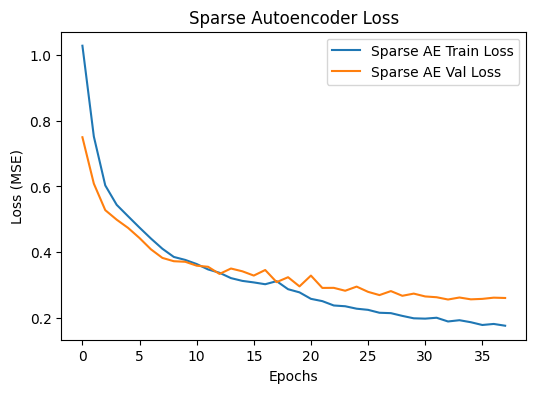

In [101]:
history_sparse = sparse_autoencoder.fit(
    x_train_scaled, x_train_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks = [estop],
    verbose=1
)

# Plot training history comparison
plt.figure(figsize=(6,4))
plt.plot(history_sparse.history['loss'], label='Sparse AE Train Loss')
plt.plot(history_sparse.history['val_loss'], label='Sparse AE Val Loss')
plt.title('Sparse Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

### Evaluating Sparse Autoencoder

Sparse AE Threshold: 0.259583

Classification Report (With Sparsity):
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       416
         1.0       0.99      1.00      0.99      2919

    accuracy                           0.99      3335
   macro avg       0.98      0.95      0.96      3335
weighted avg       0.98      0.99      0.98      3335

ROC-AUC Score (Sparse AE): 0.9622


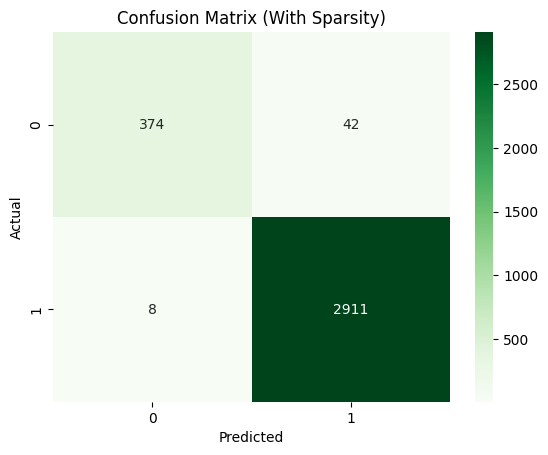

In [103]:
sparse_errors = reconstruction_errors(sparse_autoencoder, x_test_scaled)

# new threshold
normal_sparse_errors = reconstruction_errors(sparse_autoencoder, x_test_scaled[y_test == 0])
threshold_sparse = np.percentile(normal_sparse_errors, 90)
print(f"Sparse AE Threshold: {threshold_sparse:.6f}")

# Predictions
y_pred_sparse = (sparse_errors > threshold_sparse).astype(int)

print("\nClassification Report (With Sparsity):")
print(classification_report(y_test, y_pred_sparse))
print(f"ROC-AUC Score (Sparse AE): {roc_auc_score(y_test, sparse_errors):.4f}")

# Confusion Matrix
cm_sparse = confusion_matrix(y_test, y_pred_sparse)
sns.heatmap(cm_sparse, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (With Sparsity)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## `Comparison:`


| Model Type              | Accuracy | ROC–AUC | 
|--------------------------|-----------|----------|
| **Standard Autoencoder** | **98%**  | **0.948** |
| **Sparse Autoencoder**   | **99%**  | **0.962** |

- Incorporating sparsity regularization significantly enhanced the model’s ability to distinguish between normal and abnormal ECG signals by promoting compact and discriminative feature learning.